In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import datasets


In [2]:
class KMeans():
    
    def __init__(self, k, max_iterations = 20):
        # k: number of cluster
        # max_iterations: default = 20
        self._k = k
        self._max_iterations = max_iterations
    
    def fit(self, X, visualize = False):
        # X: Input X
        self._X = X
        self._no_samples, self._no_features = X.shape # N, d
        
        # Randomly initialize centroids:
        #  np.random.choice(...): lấy ra k dòng bất kì trong các dòng của X, replace = False vì STT dòng không thể trùng 
        centroids = self._X[np.random.choice(self._no_samples, self._k, replace = False), :]
        
        # Iterations:
        for i in range(self._max_iterations):
            # Find r (Assign labels)
            #  Calculate the pairwise distance between datapoint
            distances = np.array([np.linalg.norm(X - centroids[j], axis = 1) for j in range(self._k)])
            
            #  Assign data to the cluster whose distance is minimum
            labels = np.argmin(distances, axis = 0)
            
            # Calculate inertia
            inertia = np.sum([np.sum((self._X[labels == j] - centroids[j])**2) for j in range(self._k)])
            
            # Re-calculate centroids
            centroid_old = np.copy(centroids)
            for j in range(self._k):
                centroids[j] = np.mean(self._X[labels == j], axis = 0)
                
                
            # Terminate the loop if the centroids remains (converges)
            if np.all(centroid_old == centroids):
                break
            
            
            # Visualization
            if visualize == True:
                colors = ['r', 'g', 'b', 'y', 'c', 'm']
                for j in range(self._no_samples):
                    # Visualize each datapoint with color by cluster
                    plt.scatter(self._X[j, 0], self._X[j, 1], color = colors[labels[j]])
                #  Visualize centroids
                plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 200, linewidths = 3, color = 'k')
                plt.title("Iteration {}".format(i + 1))
                plt.pause(1)
            
        self._labels = labels
        self._centroids = centroids
        self._inertia = inertia
        
        return self
    
    def get_centroids(self):
        return self._centroids
    
    def get_labels(self):
        return self._labels
    
    def get_inertia(self):
        return self._inertia

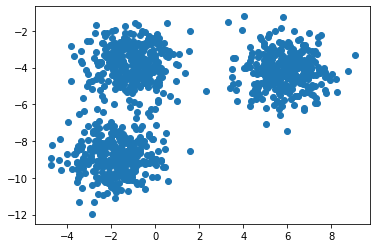

In [18]:
# Tạo dữ liệu ngẫu nhiên
X, y = make_blobs(n_samples=1000, centers=3, random_state=40)
plt.scatter(X[:, 0], X[:, 1])

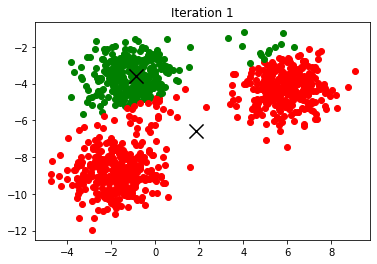

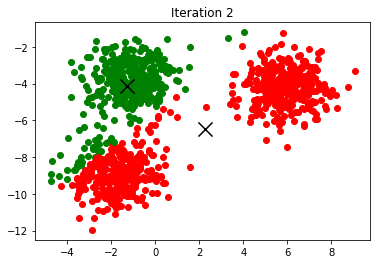

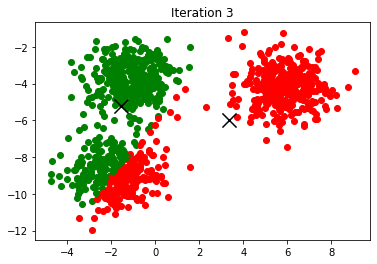

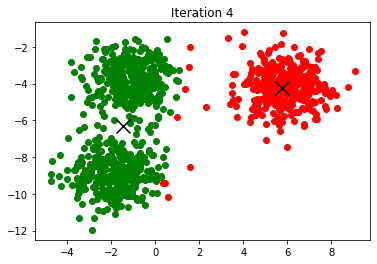

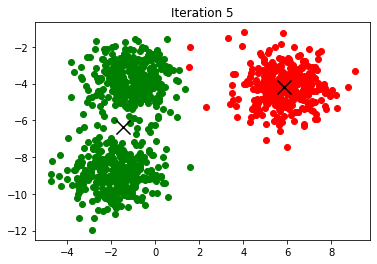

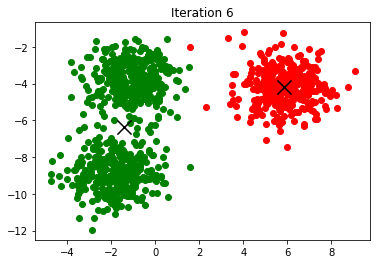

In [19]:
kmean2 = KMeans(2, max_iterations = 10)
kmean2.fit(X, visualize=True)

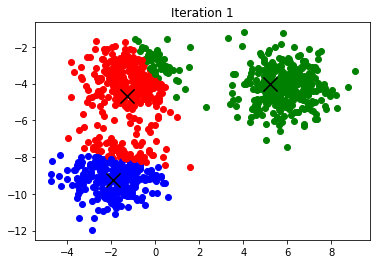

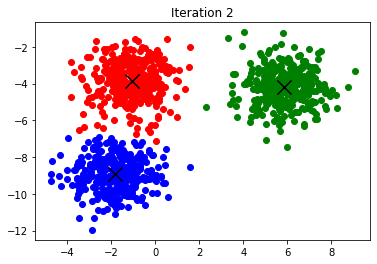

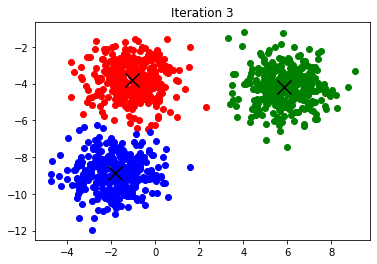

In [20]:
kmean3 = KMeans(3, max_iterations = 10)
kmean3.fit(X, visualize = True)

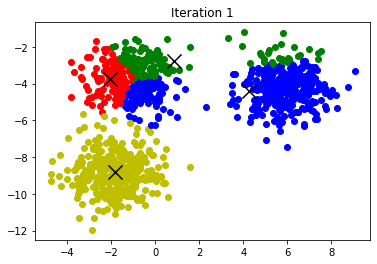

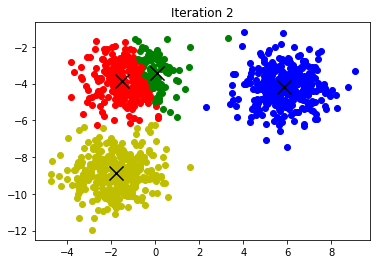

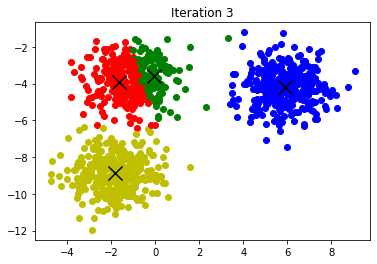

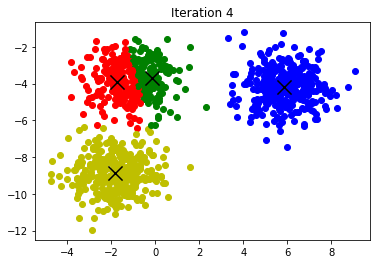

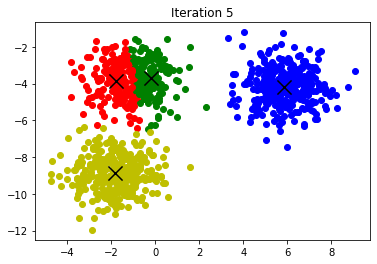

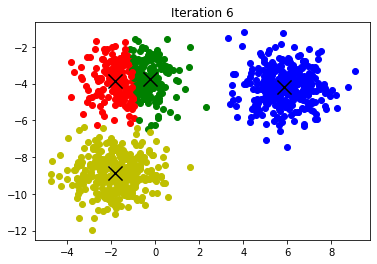

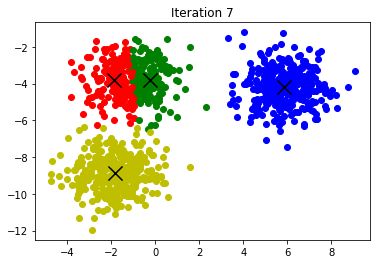

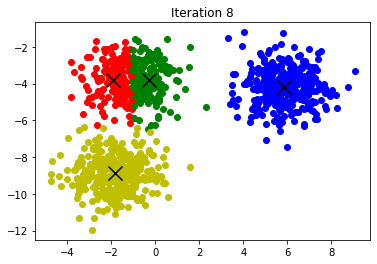

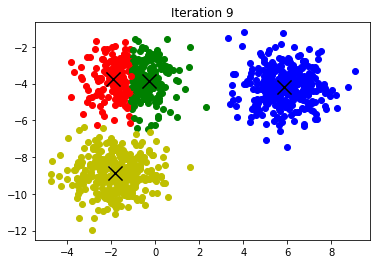

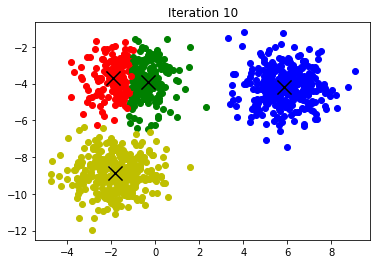

In [21]:
kmean4 = KMeans(4, max_iterations = 10)
kmean4.fit(X, visualize=True)

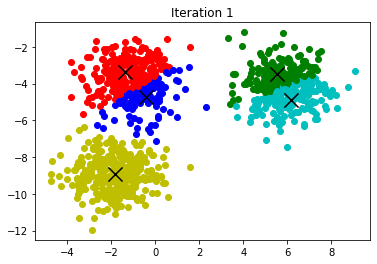

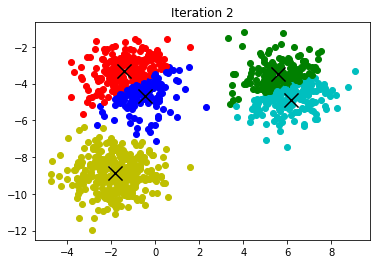

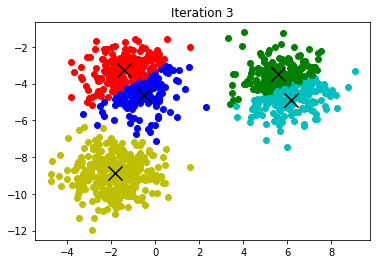

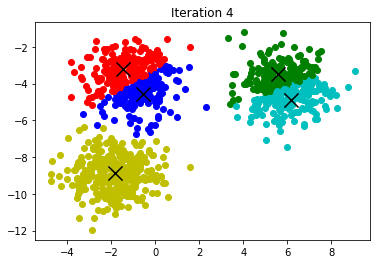

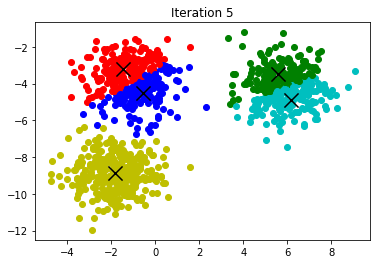

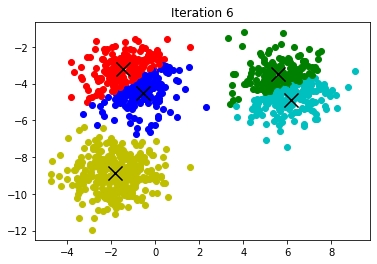

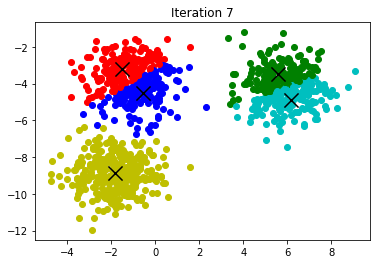

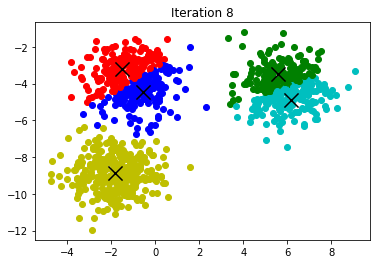

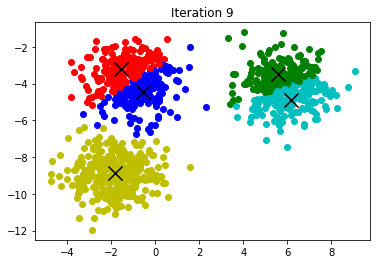

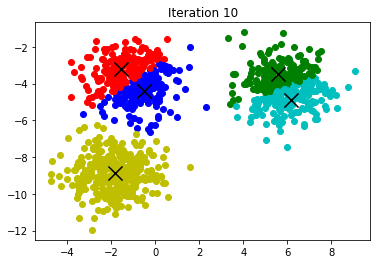

In [22]:
kmean5 = KMeans(5, max_iterations = 10)
kmean5.fit(X, visualize=True)

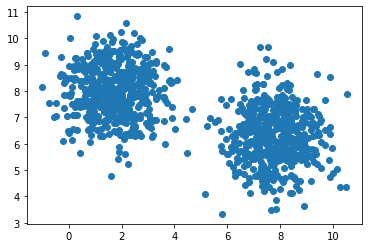

In [23]:
X_dataset_2, y = make_blobs(n_samples=1000, centers=2, random_state=20)
plt.scatter(X_dataset_2[:, 0], X_dataset_2[:, 1])

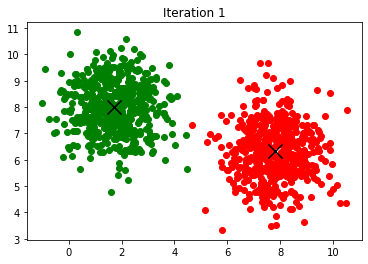

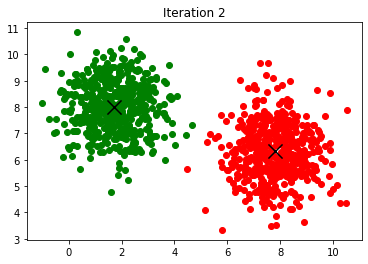

In [24]:
kmean_dataset_2 = KMeans(2, max_iterations = 10)
kmean_dataset_2.fit(X_dataset_2, visualize=True)

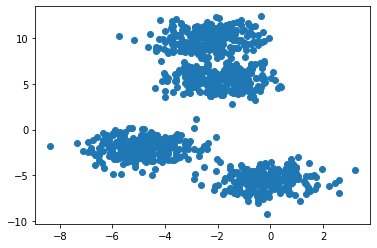

In [26]:
X_dataset_3, y = make_blobs(n_samples=1000, centers=4, random_state=50)
plt.scatter(X_dataset_3[:, 0], X_dataset_3[:, 1])

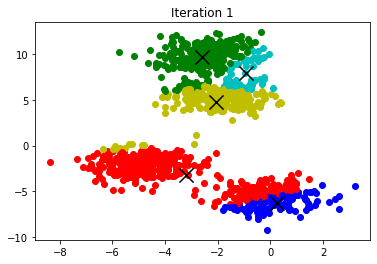

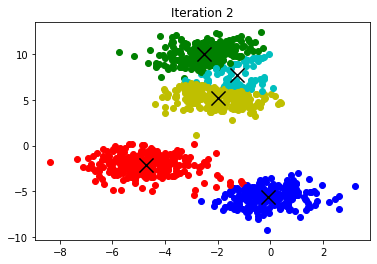

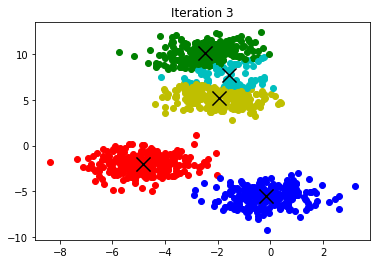

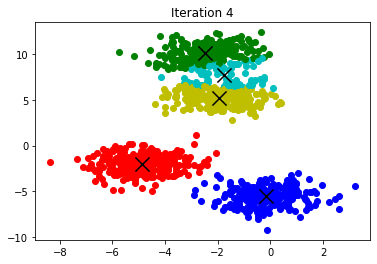

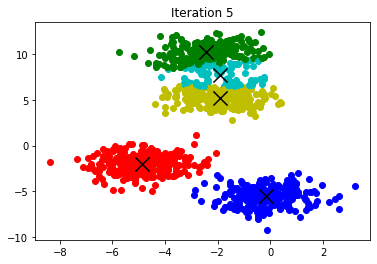

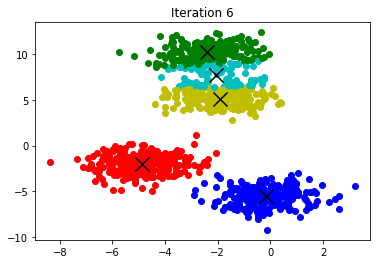

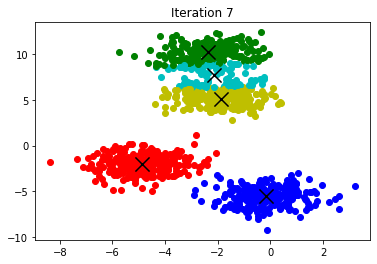

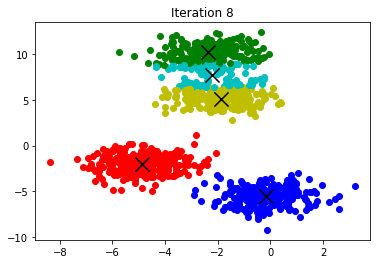

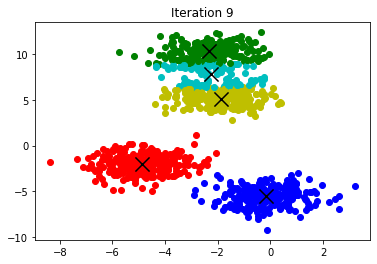

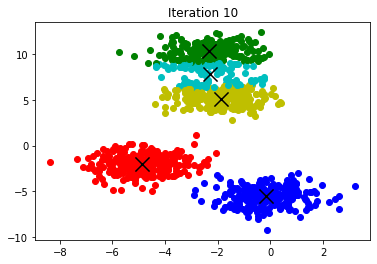

In [27]:
kmean_dataset_3 = KMeans(5, max_iterations = 10)
kmean_dataset_3.fit(X_dataset_3, visualize=True)

19191.890730752802 

6327.480104045118 

6129.485114707002 

1735.5135087596493 

1519.7135350481112 

1288.0243209508062 

1248.1899665732344 

1021.8638915641042 

934.5873815570685 



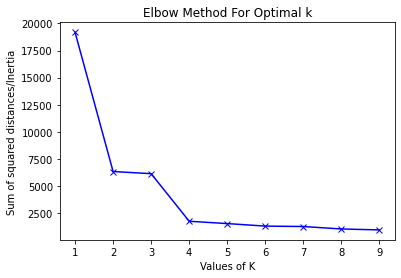

In [28]:
def draw_elbow_kmeans(X):
    Sum_of_squared_distances = []
    K = range(1, 10)
    for num_clusters in K:
        kmeans = KMeans(k = num_clusters)
        kmeans.fit(X)
        print(kmeans.get_inertia(), "\n")
        Sum_of_squared_distances.append(kmeans.get_inertia())
        
    plt.plot(K,Sum_of_squared_distances,"bx-")
    plt.xlabel("Values of K") 
    plt.ylabel("Sum of squared distances/Inertia") 
    plt.title("Elbow Method For Optimal k")
    plt.show()
draw_elbow_kmeans(X)

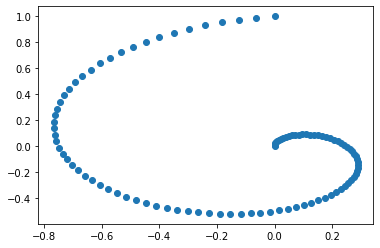

In [33]:
n_samples = 100

theta = np.linspace(0, 2*np.pi, n_samples)
r = np.linspace(0, 1, n_samples)

X_test_1 = np.zeros((n_samples, 2))
X_test_1[:, 0] = r * np.sin(theta)
X_test_1[:, 1] = r * np.cos(theta)

plt.scatter(X_test_1[:, 0], X_test_1[:, 1])
plt.show()

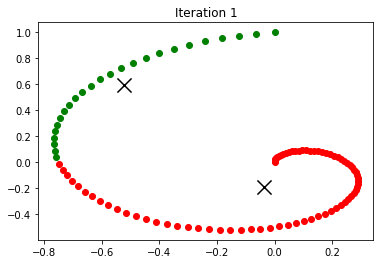

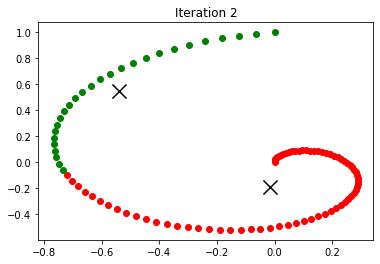

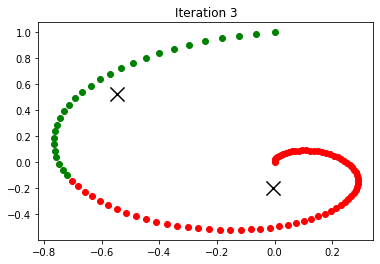

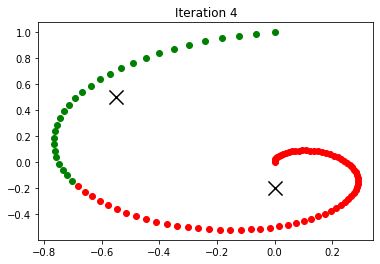

In [31]:
kmean_test_1 = KMeans(2, max_iterations = 10)
kmean_test_1.fit(X_test_1, visualize=True)

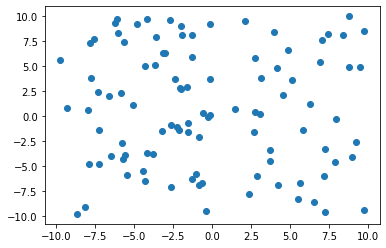

In [35]:
n_samples = 100
X_test_2 = np.random.uniform(low=-10, high=10, size=(n_samples, 2))
plt.scatter(X_test_2[:, 0], X_test_2[:, 1])
plt.show()

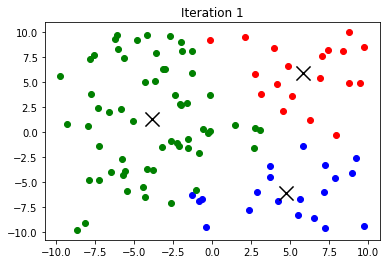

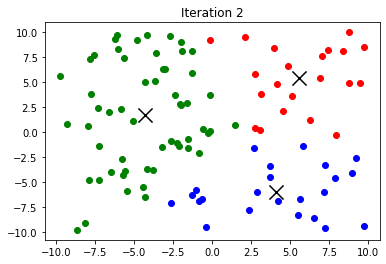

In [36]:
kmean_test_2 = KMeans(3, max_iterations = 10)
kmean_test_2.fit(X_test_2, visualize=True)

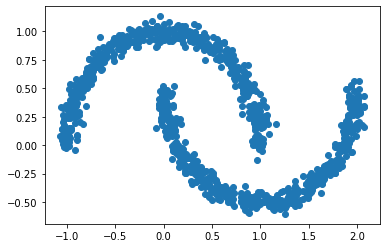

In [40]:
from sklearn.datasets import make_moons
X_test_3, y = make_moons(n_samples=1000, shuffle=True, noise=0.05, random_state=0)

plt.scatter(X_test_3[:, 0], X_test_3[:, 1])
plt.show()

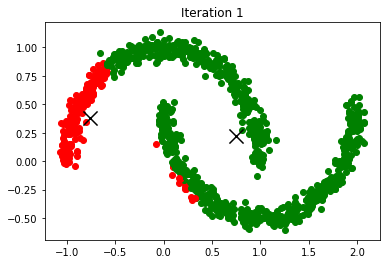

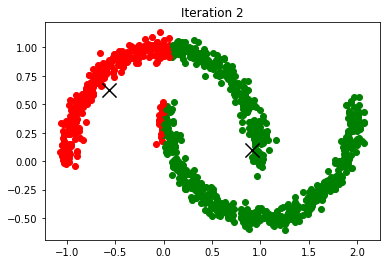

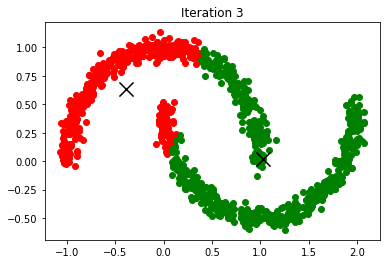

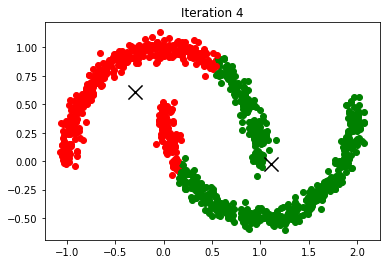

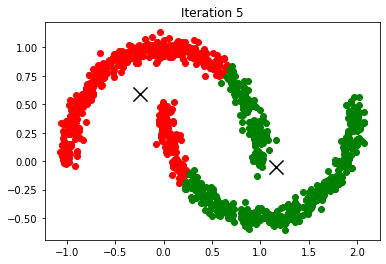

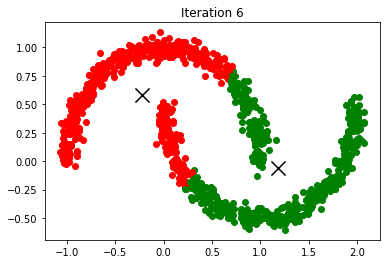

In [41]:
kmean_test_3 = KMeans(2, max_iterations = 6)
kmean_test_3.fit(X_test_3, visualize=True)

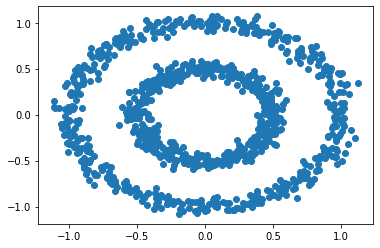

In [37]:
from sklearn.datasets import make_circles
X_test_3, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)

plt.scatter(X_test_3[:, 0], X_test_3[:, 1])
plt.show()

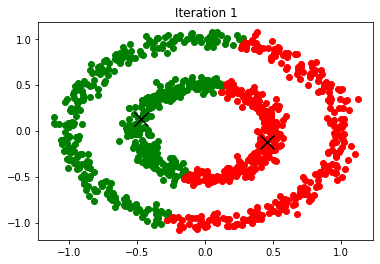

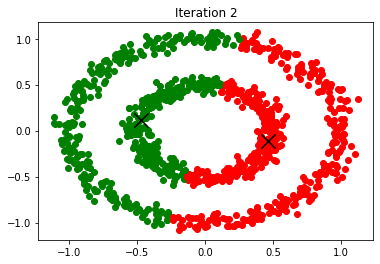

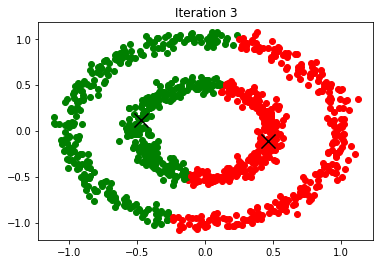

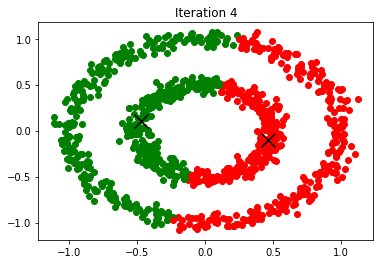

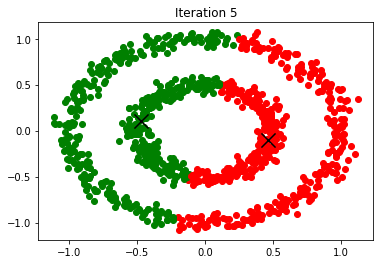

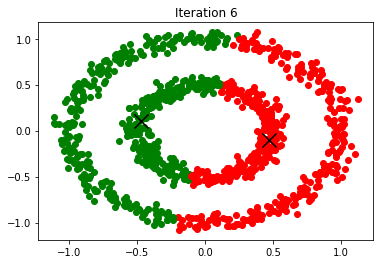

In [38]:
kmean_test_3 = KMeans(2, max_iterations = 6)
kmean_test_3.fit(X_test_3, visualize=True)